# Image Deconvolution Problem
#### This problem can be found in: http://www-personal.umich.edu/~mejn/cp/exercises.html, in under Chapter 7.

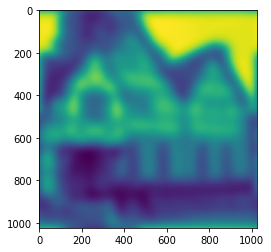

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Reading in the image into a 1024 x 1024 numpy array
N = 1024
blurimg = np.zeros((N, N))
with open("blur.txt") as blurfile:
    for line_num, line in enumerate(blurfile):
        blurimg[line_num] = np.array(line.split(" "))
        
        
plt.imshow(blurimg)
plt.show();

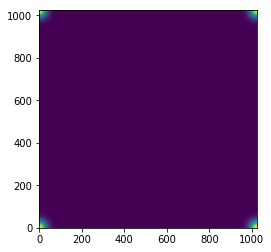

Done


In [30]:
import math

# The gaussian function, with sigma=25
def gfunc(x, y):
    sigma = 25
    return math.e**(-(x**2 + y**2) / (2*sigma**2))

point_spread = np.zeros((N, N))

for row in range(len(point_spread)):
    for col in range(len(point_spread[0])):
        if row < N/2 and col < N/2:
            point_spread[row, col] = gfunc(col, row)
        if row >= N/2 and col < N/2:
            point_spread[row, col] = gfunc(col, row-N)
        if row < N/2 and col >= N/2:
            point_spread[row, col] = gfunc(col-N, row)
        if row >= N/2 and col >= N/2:
            point_spread[row, col] = gfunc(col-N, row-N)
        
        
plt.imshow(point_spread, origin="lower")
plt.show()
        
print("Done")

## Part 3: Combining the two together: We combine the two programs to do the following:
1. Read in the blurred photo
2. Calculate the point spread function
3. Fourier transform both
4. Divide one by the other
5. Pferform an inverse transform to obtain the other photo
6. Display the unblurred photo on the screen.

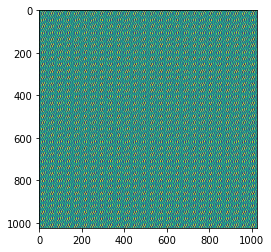

In [41]:
bktilde = np.fft.rfft2(blurimg)
fktilde = np.fft.rfft2(point_spread)
fktilde[fktilde == 0] = 1
aktilde = bktilde/(N**2*fktilde)
ak = np.fft.irfft2(aktilde)
plt.imshow(ak)
plt.show()
